### render() function handling alternatives.

The below code is taken from the documentation page of the OpenAI toolkit. And as you can see it is giving error with `env.render()`. The thing is render() uses `pyglet` that needs RGB color inputs from screen which is not present here. Hence, in this notebook we'll provide alternatives to this issue. So, that anyone of the options can be used as a replacement.


In [1]:
'''
import gym
env = gym.make('CartPole-v0')
env.reset()
for _ in range(1000):
    env.render()
    env.step(env.action_space.sample()) # take a random action
env.close()
'''

NoSuchDisplayException: ignored

### First solution: Saving and Loading the Video as output.

This solution is designed by William Xu and it uses PyVirtualDisplay, python-opengl, xvfb & the ffmpeg encoder libraries for displaying outputs from OpenAI environments. Also, this rendering solution isn't as responsive as running OpenAI VM on your machine but it gets the job done.


In [1]:
# " > /dev/null 2>&1" is used for dumping all the output messages while
# downloading the packages. Basically, in '/dev/null' everything is discarded.
# 2 is the file descriptor for Standard Error and 1 for Standard Out.

# This specificity of version is very important for compatability reasons.
!apt-get install -y xvfb x11-utils > /dev/null 2>&1
 # gym version compatability with other libraries is required for rendering with this approach.
!pip install gym==0.17.* pyvirtualdisplay==0.2.* PyOpenGL==3.1.* PyOpenGL-accelerate==3.1.*  > /dev/null 2>&1

In [5]:
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only

import math
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

In [6]:
# This creates virtual display to send the frames for being rendered.
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1366, 768))
display.start()

<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1366x768x24', ':1005'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1366x768x24', ':1005'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [7]:
def show_video():
    # This function loads the data video inline into the colab notebook.
    # By reading the video stored by the Monitor class.
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 256px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
    # This monitoring tool records the outputs from the output and saves it a
    # mp4 file in the stated directory.
    # If we don't change the video directory the videos will get stored in 'content/' directory.
    env = Monitor(env, './video', force=True)
    return env

In [8]:
env = wrap_env(gym.make('MountainCar-v0'))

In [9]:
# One methodology for rendering completed and tested.
observation = env.reset()
while True:
    env.render()
    #your agent goes here
    action = env.action_space.sample() 
    observation, reward, done, info = env.step(action) 
    if done: 
      break;
env.close()
show_video()

### Second solution: Using Matplotlib to display the screen.

We plot the state of environment after each iteration episodes for the environment under analysis after taking an action. Also, this rendering solution isn't as responsive as running OpenAI VM on your machine but it gets the job done.

In [ ]:
# !apt-get install -y xvfb python-opengl > /dev/null 2>&1
# !pip install pyvirtualdisplay > /dev/null 2>&1

In [10]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

In [11]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '400x300x24', ':1009'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '400x300x24', ':1009'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

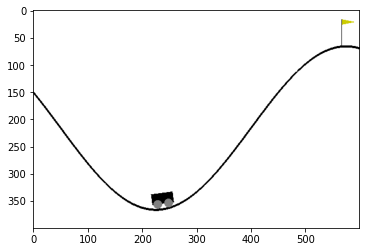

In [12]:
# This method of printing output is extremely slow and impractical.
# But, can be used as a last resort for rendering an environment output.
env = gym.make('MountainCar-v0')
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for i in range(16):
  action = env.action_space.sample()
  obs, reward, done, info = env.step(action)
  screen = env.render(mode='rgb_array')
  # Plotting the matplotlib graph in each iteration.
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break
    
ipythondisplay.clear_output(wait=True)
env.close()

In [13]:
display.stop()

<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '400x300x24', ':1009'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '400x300x24', ':1009'] oserror=None return_code=0 stdout="" stderr="" timeout_happened=False>

__Note:__ Based on the output expressibility we will proceed with the first approach to store and display outputs from the environment of open-ai gym.